# <center> FINAL PROJECT : GALAXY STELLAR MASS FUNCTION </center>
## <center>MICHELLE DENNY</center>
### <center>CTA200H 2024</center>


In [234]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import solve_ivp
import glob
from astropy.io import fits
from astropy.table import Table
from matplotlib.colors import LogNorm
from matplotlib.cm import CMRmap
from astropy.cosmology import FlatLambdaCDM
from astropy.cosmology import z_at_value
import astropy.units as u
import emcee
import gzip
import shutil
#importing all the necessary libraries

In [262]:
SMF02z05 = fits.open("C:/Users/user/SURP 2024/FINAL PROJECT/smf_total/SMF_Farmer_0.2z0.5_total.fits", memmap=True)
SMF05z08 = fits.open("C:/Users/user/SURP 2024/FINAL PROJECT/smf_total/SMF_Farmer_0.5z0.8_total.fits", memmap=True)
SMF08z11 = fits.open("C:/Users/user/SURP 2024/FINAL PROJECT/smf_total/SMF_Farmer_0.8z1.1_total.fits", memmap=True)
SMF11z15 = fits.open("C:/Users/user/SURP 2024/FINAL PROJECT/smf_total/SMF_Farmer_1.1z1.5_total.fits", memmap=True)
SMF15z20 = fits.open("C:/Users/user/SURP 2024/FINAL PROJECT/smf_total/SMF_Farmer_1.5z2.0_total.fits", memmap=True)
SMF20z25 = fits.open("C:/Users/user/SURP 2024/FINAL PROJECT/smf_total/SMF_Farmer_2.0z2.5_total.fits", memmap=True)
SMF25z30 = fits.open("C:/Users/user/SURP 2024/FINAL PROJECT/smf_total/SMF_Farmer_2.5z3.0_total.fits", memmap=True)
SMF30z35 = fits.open("C:/Users/user/SURP 2024/FINAL PROJECT/smf_total/SMF_Farmer_3.0z3.5_total.fits", memmap=True)
SMF35z45 = fits.open("C:/Users/user/SURP 2024/FINAL PROJECT/smf_total/SMF_Farmer_3.5z4.5_total.fits", memmap=True)
SMF45z55 = fits.open("C:/Users/user/SURP 2024/FINAL PROJECT/smf_total/SMF_Farmer_4.5z5.5_total.fits", memmap=True)
SMF55z65 = fits.open("C:/Users/user/SURP 2024/FINAL PROJECT/smf_total/SMF_Farmer_5.5z6.5_total.fits", memmap=True)
SMF65z75 = fits.open("C:/Users/user/SURP 2024/FINAL PROJECT/smf_total/SMF_Farmer_6.5z7.5_total.fits", memmap=True)
#opening all the fits files recursively

In [104]:
SMF02z05.info() #getting info about a given fits file

Filename: C:/Users/user/SURP 2024/FINAL PROJECT/smf_total/SMF_Farmer_0.2z0.5_total.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     20   15R x 5C   [D, D, D, D, D]   


In [105]:
print(SMF02z05[1].columns)  #printing column names

ColDefs(
    name = 'bin_center'; format = 'D'
    name = 'bin_width'; format = 'D'
    name = 'phi'; format = 'D'
    name = 'phi_lo'; format = 'D'
    name = 'phi_hi'; format = 'D'
)


In [264]:
data0205 = Table(SMF02z05[1].data)
data0508 = Table(SMF05z08[1].data)
data0811 = Table(SMF08z11[1].data)
data1115 = Table(SMF11z15[1].data)
data1520 = Table(SMF15z20[1].data)
data2025 = Table(SMF20z25[1].data)
data2530 = Table(SMF25z30[1].data)
data3035 = Table(SMF30z35[1].data)
data3545 = Table(SMF35z45[1].data)
data4555 = Table(SMF45z55[1].data)
data5565 = Table(SMF55z65[1].data)
data6575 = Table(SMF65z75[1].data)
data0205  #formatting all these tables into a easier, cleaner viewing format

bin_center,bin_width,phi,phi_lo,phi_hi
float64,float64,float64,float64,float64
8.177983417849008,0.14403316430198387,0.022976397603087353,0.02031816432114186,0.025634630885032848
8.375,0.25,0.020366722040118978,0.018006874169135646,0.02272656991110231
8.625,0.25,0.0158656119616297,0.014002990699740918,0.017728233223518484
8.875,0.25,0.01289988973830012,0.01137351601189926,0.01442626346470098
9.125,0.25,0.009879061189888384,0.00869505565948139,0.011063066720295379
9.375,0.25,0.007319121905896148,0.006425184268394415,0.00821305954339788
9.625,0.25,0.005716028812202262,0.004998763703147564,0.006433293921256959
9.875,0.25,0.004483650996425087,0.003896451332442271,0.005070850660407903
10.125,0.25,0.0036119691267290366,0.003113884823734714,0.004110053429723359


In [6]:
labels = [
    "0.2 < z $\leq$ 0.5", "0.5 < z $\leq$ 0.8", "0.8 < z $\leq$ 1.1", 
    "1.1 < z $\leq$ 1.5", "1.5 < z $\leq$ 2.0", "2.0 < z $\leq$ 2.5", 
    "2.5 < z $\leq$ 3.0", "3.0 < z $\leq$ 3.5", "3.5 < z $\leq$ 4.5", 
    "4.5 < z $\leq$ 5.5", "5.5 < z $\leq$ 6.5", "6.5 < z $\leq$ 7.5"
]

raw_total = [data0205 ,data0508,data0811,data1115,data1520,data2025,data2530,data3035,data3545,data4555,data5565,data6575]

def build_data_sets(raw_total):
""" This function takes the set of astropy tables and assigns each column to a given quantity

Parameters: raw_total-----------array of astropy tables indeterminate, usually integer values

Returns: datasets----- list of columns for each table so we can call them easily during plotting



"""   
    
    datasets = []
    for data in raw_total:
        smf = data['phi']
        logmass = data['bin_center']
        uppererr = data['phi_hi']
        lowererr = data['phi_lo']

        datatuples = []
        for mass,phi,upper,lower in zip(logmass,smf,uppererr,lowererr):
            datatuples.append((mass,phi,upper,lower))
        datasets.append(datatuples)
    return datasets


In [271]:
dataset_total = build_data_sets(raw_total)
#dataset_total
#data0205,data0508,data0811,data1115,data1520,data2025,data2530,data3035,data3545,data4555,data5565,data6575

In [10]:
rawsfg = sorted(glob.glob('C:/Users/user/SURP 2024/FINAL PROJECT/smf_sfg/*sfg.fits'))
rawqg = sorted(glob.glob('C:/Users/user/SURP 2024/FINAL PROJECT/smf_qg/*qg.fits'))  #using glob.glob to sort files by givencommon file charachters
#calling each file and converting them to astropy tables is very recursive for quiesent and starforming galaxies, 
#so we create a function
def sortfiles(rawsfg):
""" This function returns astropy tables from a list of files

Parameters: rawsfg/rawqg-----------array-like, unopened FITS files

Returns:

fileTab_list----array of astropy tables that can be then sorted by column using the above function build_data_sets

"""
    fileopen_list = []
    fileTab_list = []

    for file in rawsfg:
        fileopen = fits.open(file, memmap = True)
        fileopen_list.append(fileopen)
        #print(Table(sfgopen_list[0][1].data))
    for table in fileopen_list:
        filetab = table[1].data
            #print(i,table[1])
        fileTab_list.append(filetab)

    return fileTab_list


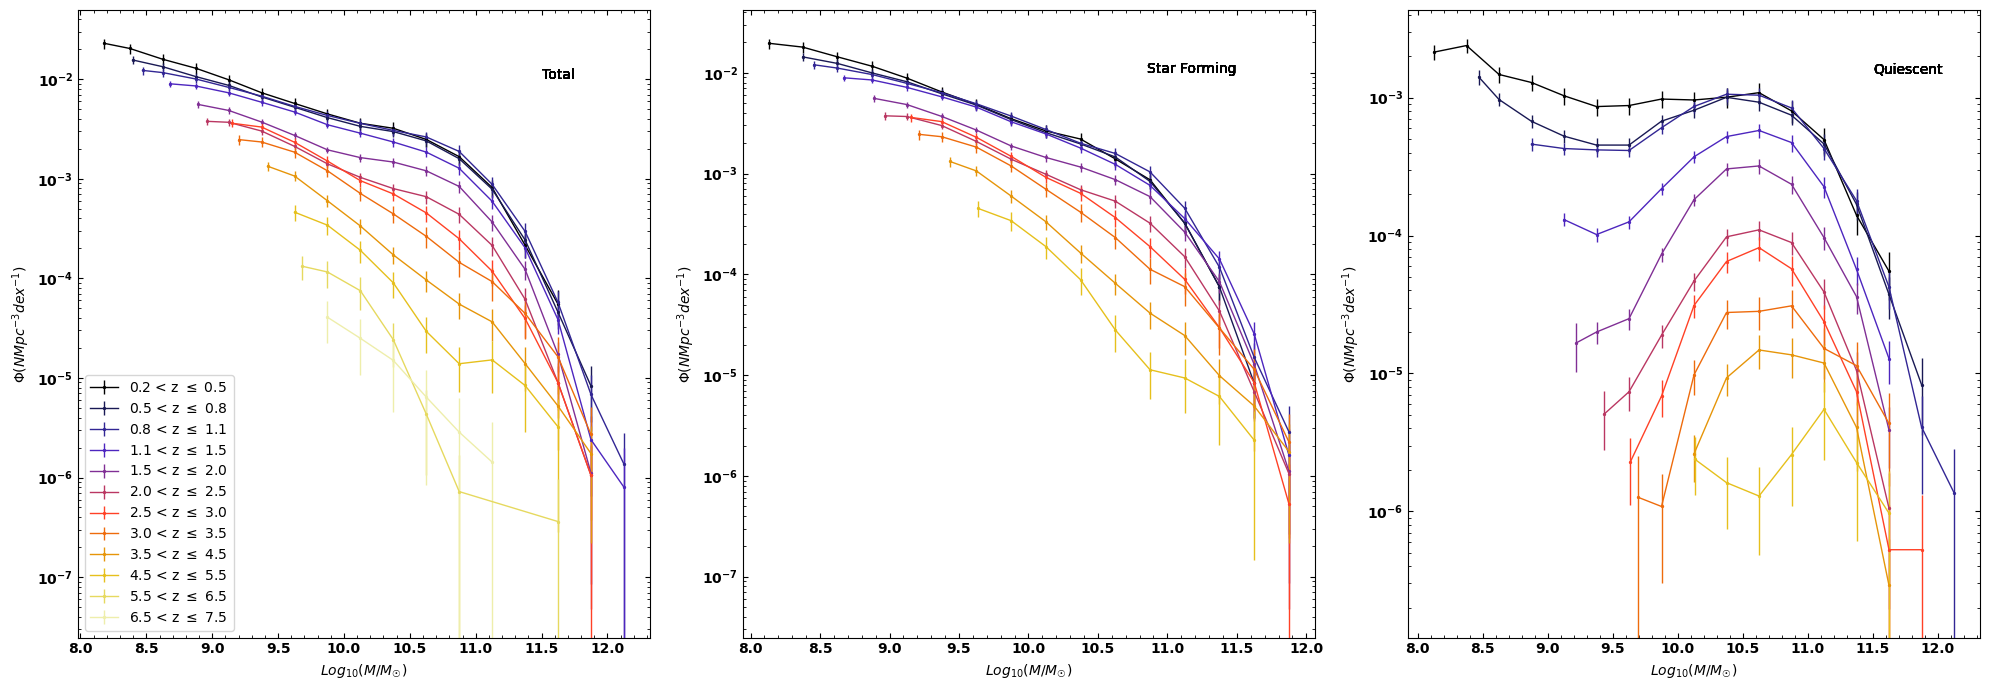

In [272]:
sfgfiles = sortfiles(rawsfg)
qgfiles = sortfiles(rawqg)

dataset_sfg = build_data_sets(sfgfiles)
dataset_qg = build_data_sets(qgfiles)

fig = plt.figure(figsize = (20,7))
ax = fig.add_subplot(1, 3, 1)
# Loop through the data and plot each pair using RdPu colormap
for i,data in enumerate(dataset_total):  #plotting using a forloop
    logmass,smf,uppererr,lowererr = zip(*data)
    lower_err = [smf - lower for smf, lower in zip(smf, lowererr)]
    upper_err = [upper - smf for smf, upper in zip(smf, uppererr)]
    ax.errorbar(logmass,smf,yerr=[lower_err, upper_err], label=labels[i], color=CMRmap(i/12), linewidth =1 , marker = '.',ms = '2.75')
    ax.text(11.5,0.01, "Total")
fontsize = 10
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')


ax.yaxis.set_ticks_position('both')
ax.minorticks_on()
ax.tick_params(which = 'both',direction="in")
ax.xaxis.set_ticks_position('both')
ax.set_yscale('log')
ax.set_xlabel("$Log_{10}(M/M_\u2609$)")
ax.set_ylabel("$\Phi(N Mpc^{-3} dex^{-1}$)")
plt.legend()

    #plt.semilogy(logmass,smf, label=labels[i], color=CMRmap(i/len(data)), linewidth =1 , ms = '1')

ax = fig.add_subplot(1, 3, 2)
# Loop through the data and plot each pair using RdPu colormap
for i,data in enumerate(dataset_sfg):
    logmass,smf,uppererr,lowererr = zip(*data)
    lower_err2 = [smf - lower for smf, lower in zip(smf, lowererr)]
    upper_err2 = [upper - smf for smf, upper in zip(smf, uppererr)]
    ax.errorbar(logmass,smf,yerr=[lower_err2, upper_err2], label=labels[i], color=CMRmap(i/12), linewidth =1 , marker = '.',ms = '2.75')
    ax.text(10.85,0.01, "Star Forming")
    #plt.semilogy(logmass,smf, label=labels[i], color=CMRmap(i/len(data)), linewidth =1 , ms = '1')


fontsize = 10
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')


ax.yaxis.set_ticks_position('both')
ax.minorticks_on()
ax.tick_params(which = 'both',direction="in")
ax.xaxis.set_ticks_position('both')
ax.set_yscale('log')
ax.set_xlabel("$Log_{10}(M/M_\u2609$)")
ax.set_ylabel("$\Phi(N Mpc^{-3} dex^{-1}$)")

ax = fig.add_subplot(1, 3, 3)
# Loop through the data and plot each pair using RdPu colormap
for i,data in enumerate(dataset_qg):
    logmass,smf,uppererr,lowererr = zip(*data)
    lower_err = [smf - lower for smf, lower in zip(smf, lowererr)]
    upper_err = [upper - smf for smf, upper in zip(smf, uppererr)]
    ax.errorbar(logmass,smf,yerr=[lower_err, upper_err], label=labels[i], color=CMRmap(i/12),linewidth =1 , marker = '.',ms = '2.75')
    ax.text(11.5,0.0015, "Quiescent")
    #plt.semilogy(logmass,smf, label=labels[i], color=CMRmap(i/len(data)), linewidth =1 , ms = '1')


fontsize = 10
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')


ax.yaxis.set_ticks_position('both')
ax.minorticks_on()
ax.tick_params(which = 'both',direction="in")
ax.xaxis.set_ticks_position('both')
ax.set_yscale('log')
ax.set_xlabel("$Log_{10}(M/M_\u2609$)")
ax.set_ylabel("$\Phi(N Mpc^{-3} dex^{-1}$)")
plt.tight_layout()  #whitespace
plt.show()



In [108]:
SMF02z05.close()
SMF05z08.close()
SMF08z11.close()
SMF11z15.close()
SMF15z20.close()   #closing all fits files
SMF20z25.close()
SMF25z30.close()
SMF30z35.close()
SMF35z45.close()
SMF45z55.close()
SMF55z65.close()
SMF65z75.close()

PART 2

In [273]:
mcmcparams = fits.open("C:/Users/user/SURP 2024/FINAL PROJECT/Medianposterior/SMF_Farmer_fitted_params_mcmc_total.fits", memmap=True)
fitted_params = Table(mcmcparams[1].data) #extracting table data
#fitted_params
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)  #to get top x-axis in Gyr from redshift data


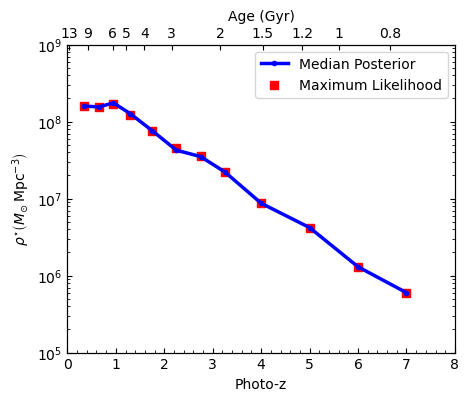

In [275]:
z_lo = fitted_params.columns[0]
z_hi = fitted_params.columns[1]
rho_mp= fitted_params.columns[22]
rho_mp_lo= fitted_params.columns[23]
rho_mp_hi= fitted_params.columns[24]
rho_ml= fitted_params.columns[25]

acc_rho_mp = [i * 1e7 for i in rho_mp]  #cause the data was given in 1e-7 Msun Mpc^-3
acc_rho_ml = [i * 1e7 for i in rho_ml]

intervals = [(z_lo, z_hi) for z_lo, z_hi in zip(z_lo, z_hi)]
centre = [(z_hi + z_lo)/2 for z_lo, z_hi in zip(z_lo, z_hi)]
zvals= np.arange(0,8)
cosmo = FlatLambdaCDM(H0=70*u.km/u.s/u.Mpc, Om0=0.3)
ages = np.array([13, 9, 6, 5, 4, 3, 2, 1.5, 1.2, 1,0.8])*u.Gyr
ageticks = [z_at_value(cosmo.age, age) for age in ages]


fig = plt.figure(figsize = (5,4))
ax = fig.add_subplot(1, 1, 1)
#plotting the stellar mass density with respect to redshift intervals

plt.semilogy(centre, acc_rho_mp,linewidth=2.5,marker = '.',label = 'Median Posterior',color = 'blue')
plt.scatter(centre, acc_rho_ml, marker = 's', label = 'Maximum Likelihood', color = 'red')


ax2 = ax.twiny()
ax2.set_xticks(ageticks)
ax2.set_xticklabels(['{:g}'.format(age) for age in ages.value])
ax.yaxis.set_ticks_position('both')
ax.minorticks_on()
ax.tick_params(which = 'both',direction="in")
ax2.tick_params(which = 'both',direction="in")
zmin, zmax = 0.0, 8.0
ax.set_xlim(zmin, zmax)
ax.set_xlabel('Photo-z')
ax.set_ylabel(r'$\rho^{\star} \left( M_{\odot} \, \text{Mpc}^{-3} \right)$')
ax2.set_xlim(zmin, zmax)
ax2.set_xlabel('Age (Gyr)')
ax.set_ylim(10e4,10e8)
ax.legend()